In [1]:
# Bibliotecas
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Abrindo a base de dados


In [2]:
filename = pathlib.Path.cwd() / 'Base_MindMiners.xlsx'
db = pd.read_excel('Base_MindMiners.xlsx')

In [3]:
db.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Variável,Tipo,Pergunta,Respostas/Categorias
1,NaN,P1,Resposta Única,Quantas vezes você costuma viajar por ano?,(1) 1 a 3 vezes; (2) 4 a 6 vezes; (3) 7 a 10 v...
2,NaN,P2,Resposta Múltipla,Qual foi o princípal motivo de suas ultimas vi...,(1) Visitar amigos; (2) Visitar familia; (3)La...
3,NaN,P3,Escala,O quão importante para você é a infraestrutura...,1 (Não Utilizo) ; 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Utili...
4,NaN,P4,Escala,Restaurante,1 (Não utilizo) ; 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Utili...


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  72 non-null     object 
 2   Unnamed: 2  72 non-null     object 
 3   Unnamed: 3  72 non-null     object 
 4   Unnamed: 4  72 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [5]:
df = pd.read_excel('Base_MindMiners.xlsx', sheet_name='Pesquisa-Respostas')

In [6]:
df.head()

,Unnamed: 0,P1,P2,P3,P4,Unnamed: 5,P5,P6,.P7,P8,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,NaN,2.0,7,7.0,5.0,NaN,4,2,6,7.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,NaN,3.0,2,2.0,6.0,4.0,4,2,5,1.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,NaN,1.0,7,7.0,5.0,NaN,4,5,6,6.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,NaN,1.0,3,4.0,4.0,NaN,6,6,1,7.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,NaN,2.0,7,6.0,7.0,NaN,3,3,7,6.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel


# Limpando a base de dados

In [7]:
# Remover as colunas com índices 'Unnamed'
df = df.drop(columns=[coluna for coluna in df.columns if coluna.startswith('Unnamed:')])

In [8]:
df.head()

,P1,P2,P3,P4,P5,P6,.P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel


In [9]:
# Usando a função split para remover espaços nos indexes das colunas
df.columns = df.columns.str.strip()

In [10]:
# # Usando a função str.replace para remover "." dos indexes das colunas
df.columns = df.columns.str.replace(".", "")

<ipython-input-10-99a3ba088efe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


Removendo conteudo indesejado das colunas

In [11]:
# Lista com todas as colunas
nomes = list(df)

In [12]:
# Primeria coluna
df.loc[~df.loc[:, nomes[0]].isin(range(1,6)), nomes[0]] = None

In [13]:
# Seguna coluna
df.loc[~df.loc[:, nomes[1]].isin(range(1,9)), nomes[1]] = None

In [14]:
# Coluna 3 a 58
for coluna in range(2, 58):
    df.loc[~df.loc[:, nomes[coluna]].isin(range(1,8)), nomes[coluna]] = None

In [15]:
# Coluna Qesc
df.loc[~df.loc[:, nomes[58]].isin(range(1,7)), nomes[58]] = None

In [16]:
# Coluna Qnat
df.loc[~df.loc[:, nomes[60]].isin(range(0,6)), nomes[60]] = None

In [17]:
# Coluna Qcama
df.loc[~df.loc[:, nomes[62]].isin(range(0,5)), nomes[62]] = None

In [18]:
# Coluna Qche
lista_quinta_feira = ["Quinta-Feira", "Quinta Feira", "quinta-Feira", "quintaFeira"]
df.loc[df.loc[:, nomes[64]].isin(lista_quinta_feira), nomes[64]] = 'Quinta-Feira'

In [19]:
# tab = df['Qnat'].value_counts(sort=False)
# tab.to_frame()

In [20]:
# Checando qual indice pertence a qual coluna
# nomes[60]

# Primeira análise dos dados

Preparando o banco de dados para a análise exploratória

In [21]:
# Criando uma copia do banco de dados original para fazer a análise exploratória
df_ae = df.copy()
df_ae

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3,7.0,6.0,6,6,2,4.0,7,5.0,...,Solteiro,2.0,6.0,Domingo,5.0,5.0,2.0,1.0,A,Pesquisa Hotel
1264,1.0,3,7.0,7.0,5,3,6,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,5.0,4.0,2.0,2.0,A,Pesquisa
1265,2.0,7,6.0,6.0,4,5,6,6.0,5,1.0,...,Casado,2.0,3.0,Quinta-Feira,4.0,5.0,2.0,1.0,A,Dados para Hotel
1266,2.0,3,5.0,5.0,6,5,7,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,4.0,4.0,2.0,3.0,A,Coleta de dados


In [30]:
# Frequência de viagem
df_ae['P1'] = df_ae['P1'].astype('category')
df_ae['P1'].cat.categories = ['1 a 3', '4 a 6', '7 a 10', '10+', 'Não Viaja']

# Faixa etaria
df_ae['Qid'] = df_ae['Qid'].astype('category')
df_ae['Qid'].cat.categories = ['18-', '18 a 24', '25 a 34', '35 a 44', '45 a 54', '55+']

# Estadia media
df_ae['Qesc'] = df_ae['Qesc'].astype(float)

# Regiao
df_ae['Qreg'] = df_ae['Qreg'].astype('category')
df_ae['Qreg'].cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

# Gênero
df_ae['Qgen'] = df_ae['Qgen'].astype('category')
df_ae['Qgen'].cat.categories = ['Masculino', 'Feminino']

# Número de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Motivo viagem
df_ae['P2'] = df_ae['P2'].astype('category')
df_ae['P2'].cat.categories = ['Visitar amigos', 'Visitar familia', 'Lazer', 'Pesquisa Ciêntifica', 'Trabalho', 'Viagem gastronomica', 'Desconectar'] 

df_ae

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,4 a 6,Desconectar,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,55+,Masculino,Sul,B,Dados para Marketing
1,7 a 10,Visitar familia,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,55+,Masculino,Norte,B,NaN
2,1 a 3,Desconectar,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,35 a 44,Masculino,Sul,B,Dados para Hotel
3,1 a 3,Lazer,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,18-,Feminino,Sul,B,Marketing
4,4 a 6,Desconectar,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,18 a 24,Masculino,Sul,A,Dados para Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,4 a 6,Lazer,7.0,6.0,6,6,2,4.0,7,5.0,...,Solteiro,2.0,6.0,Domingo,5.0,45 a 54,Feminino,Sudeste,A,Pesquisa Hotel
1264,1 a 3,Lazer,7.0,7.0,5,3,6,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,5.0,35 a 44,Feminino,Sul,A,Pesquisa
1265,4 a 6,Desconectar,6.0,6.0,4,5,6,6.0,5,1.0,...,Casado,2.0,3.0,Quinta-Feira,4.0,45 a 54,Feminino,Sudeste,A,Dados para Hotel
1266,4 a 6,Lazer,5.0,5.0,6,5,7,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,4.0,35 a 44,Feminino,Centro Oeste,A,Coleta de dados


Primeiramente, separamos as colunas que acreditamos serem as mais importantes para definir o público-alvo

In [31]:
freq_de_viagem = df_ae['P1'] # qualitativa   !!!!!
faixa_etaria = df_ae['Qid'] # qualitativa 
nivel_escolaridade = df_ae['Qesc'] # qualitativa
motivo_viagem = df_ae['P2'] # qualitativa    !!!!!!
classe = df_ae['Qclasse'] # qualitativa
genero = df_ae['Qgen'] # qualitativa
estado_civil = df_ae['Qciv'] # qualitativa
filhos = df_ae['Qnat'] # quantitativa
estadia_media = df_ae['Qest'] # quantitativa   !!!!!!
regiao = df_ae['Qreg'] # qualitativa

#quantitativa e qualitativa --> histograma e boxplot
#qualitativa e qualitativa --> tabela cruzada e grafico de barra
#quantitativa e quantitativa --> gráfico de dispersão

Abaixo está a análise exploratória. Nossa ideia inicial é ver qual é o "tipo de pessoa" que viaja com mais frequência. Além disso, fizemos algumas outras análises para obter informações importantes a respeito do banco de dados.

In [32]:
# Cores
cores = ['lightcoral', 'yellow', 'darkgoldenrod', 'limegreen', 'dodgerblue', 'purple', 'red']
cores2 = [ 'pink', 'blue', 'yellow']
cores3 = ['blue', 'red']

In [33]:
freq_de_viagem

0           4 a 6
1          7 a 10
2           1 a 3
3           1 a 3
4           4 a 6
          ...    
1263        4 a 6
1264        1 a 3
1265        4 a 6
1266        4 a 6
1267    Não Viaja
Name: P1, Length: 1268, dtype: category
Categories (5, object): ['1 a 3', '4 a 6', '7 a 10', '10+', 'Não Viaja']

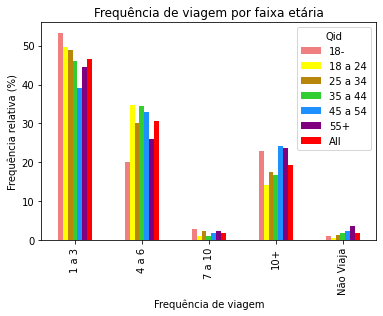

In [34]:
# Gráfico de barras de frequência de viagem por faixa etária
freq_x_idade = pd.crosstab(freq_de_viagem, faixa_etaria, normalize = 'columns', margins = True).round(3)*100

freq_x_idade.plot.bar(color = cores)
plt.title('Frequência de viagem por faixa etária')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

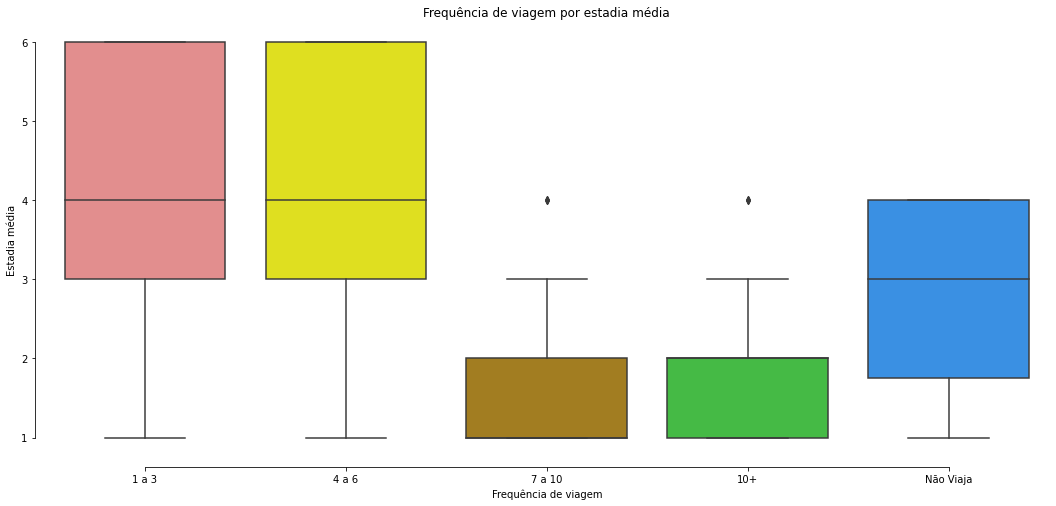

In [35]:
# Boxplot da frequência de viagem pela estadia média
plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=estadia_media,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por estadia média')
plt.xlabel('Frequência de viagem')
plt.ylabel('Estadia média')
sns.despine(offset=10, trim=True)

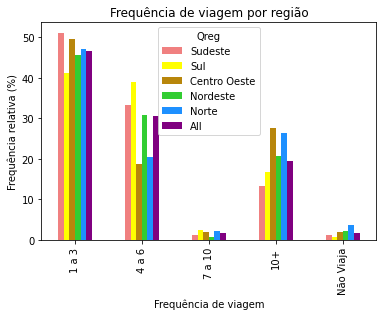

In [36]:
# Gráfico de barras de frequência de viagem por região
freq_x_regiao = pd.crosstab(freq_de_viagem, regiao, normalize = 'columns', margins = True).round(3)*100
#normalize = index --> Ex: Freq.A: sudeste + sul + nordeste + centro oeste = 100%
#normalize = columns --> Ex: Sudeste - freq.A + sudeste - freq.B + sudeste - freq.C - 100%

freq_x_regiao.plot.bar(color = cores)
plt.title('Frequência de viagem por região')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

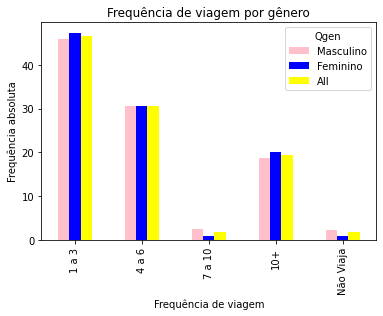

In [37]:
# Gráfico de barras de frequência de viagem por gênero
freq_x_gen = pd.crosstab(freq_de_viagem, genero, normalize = 'columns', margins = True).round(3)*100

freq_x_gen.plot.bar(color = cores2)
plt.title('Frequência de viagem por gênero')
plt.ylabel('Frequência absoluta') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

Para as seguintes análises decidimos criar um dataframe novo apenas com as famílias, ou seja, com as pessoas casadas que tem pelo menos um filho, e outro dataframe com as pessoas que não são casadas

In [38]:
df_familia = df_ae.copy()

# Filtrando apenas as familias
casados = df_ae['Qciv'] == 'Casado'
filhos = df_ae['Qnat'].isin(range(1,6))

# Criando um banco de dados apenas com as familias
df_familia = df_familia.loc[casados & filhos, :]


In [39]:
df_nao_familia = df_ae.copy()

# # Filtrando apenas as "não familias"
nao_casados = df_ae['Qciv'] != 'Casado'

# Criando um banco de dados apenas com as "não familias"
df_nao_familia = df_ae.loc[nao_casados, :]


In [40]:
# Tempo de estadia, em porcentagem, de uma familia e de uma "não familia"

df_familia['Estadia_familia'] = df_familia['Qest'] #essa mudanca de nome esta causando o erro
estadia_familia = (df_familia['Estadia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']
estadia_nao_familia = (df_nao_familia['Estadia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

Qest_familia_x_naofamilia = pd.concat([estadia_familia, estadia_nao_familia], axis=1)
print(Qest_familia_x_naofamilia)

     Estadia_familia  Estadia_nao_familia
1.0             8.86                16.80
2.0             5.06                17.97
3.0            40.51                11.52
4.0            39.87                12.30
6.0             5.70                41.41


<ipython-input-40-1fb8e2d7ffd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']


In [41]:
# Frequência de viagem, em porcentagem, de uma familia e de uma "não familia"

df_familia['Frequencia_familia'] = df_familia['P1']
frequencia_familia = (df_familia['Frequencia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']
frequencia_nao_familia = (df_nao_familia['Frequencia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

P1_familia_x_naofamilia = pd.concat([frequencia_familia, frequencia_nao_familia], axis=1)
print(P1_familia_x_naofamilia)

           Frequencia_familia  Frequencia_nao_familia
1 a 3                   56.13                   41.43
4 a 6                   29.03                   24.29
7 a 10                   1.61                    2.04
10+                     11.61                   30.20
Não Viaja                1.61                    2.04


<ipython-input-41-03396b5e0168>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']


Por último fizemos uma análise do motivo da viagem 

In [42]:
# Motivo da viagem em porcentagem

df_ae['Motivo_viagem'] = df_ae['P2']
(df_ae['Motivo_viagem'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()


,Motivo_viagem
Visitar amigos,2.62
Visitar familia,18.35
Lazer,41.94
Pesquisa Ciêntifica,1.41
Trabalho,12.40
Viagem gastronomica,1.21
Desconectar,22.08


# Clusterização

In [ ]:
# Vamos criar as dummies para usar o método de clusterização K-means
estado_dummies = pd.get_dummies(df['Qciv'])
df = pd.concat([df, estado_dummies], axis=1)
df

In [ ]:
# Vamos criar as dummies para usar o método de clusterização K-means
classe_dummies = pd.get_dummies(df['Qclasse'])
df = pd.concat([df, classe_dummies], axis=1)
df

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df.columns

In [ ]:
X = df.loc[:, ['P1', 'P2', 'Casado', 'Divorciado', 'A', 'B', 'C', 'Separado', 'Solteiro', 'Viúvo', 'Qesc', 'Qest', 'Qnat', 'Qreg']]
X

In [ ]:
X = X.replace(r'^\s*$', np.nan, regex=True)
X = X.dropna()

In [ ]:
X.isna()

In [ ]:
tab = X['P1'].value_counts(sort=False)
tab.to_frame()

In [ ]:
# Criando um objeto KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Treinando o modelo e obtendo as atribuições de cluster
labels = kmeans.fit_predict(X)

In [ ]:
cluster_0 = X[labels == 0]
cluster2.value_counts()

In [ ]:
# Visualizando os clusters e os centróides
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=3, color='blue', zorder=10)
plt.show()

In [ ]:
# Separando os dados por cluster
cluster0 = X.iloc[labels == 0, :]
cluster1 = X.iloc[labels == 1, :]
cluster2 = X.iloc[labels == 2, :]

# Plotando os clusters em gráficos diferentes
plt.scatter(cluster0.iloc[:, 0], cluster0.iloc[:, 1], color='red', label='Cluster 0')
plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], color='blue', label='Cluster 1')
plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], color='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=3, color='black', zorder=10, label='Centroids')
plt.legend()
plt.show()